In [116]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError,categorical_crossentropy,sparse_categorical_crossentropy
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError, Accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE


In [117]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iabhishekofficial/mobile-price-classification",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)



C:\Users\mrtat\AppData\Local\Temp\ipykernel_16264\2866197052.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [118]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [119]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [120]:
df.duplicated().sum()

0

In [121]:
X_train = df.drop(['price_range'], axis=1)
y_train = df['price_range']

In [122]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

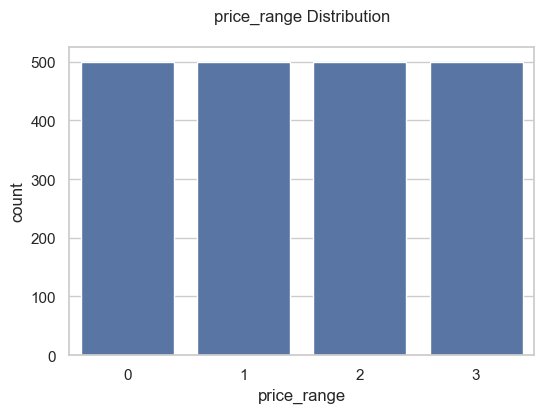

In [123]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='price_range', data=df)
plt.title('price_range Distribution\n')
plt.show()

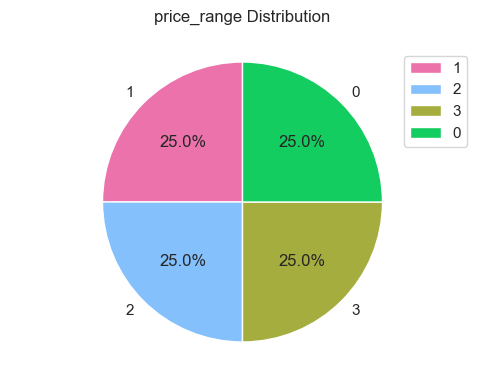

In [124]:
revenue_counts = df['price_range'].value_counts()
revenue_counts.plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%',   # add in percentages
    startangle=90,       # start angle 90°   
    colors=["#eb72aa","#84c0fc","#a4ad3e","#14cd61"],  # Custom colors for the pie chart    
)

plt.title('price_range Distribution\n')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(labels=revenue_counts.index)
plt.ylabel('')  # Hide y-label
plt.show()

In [125]:
def build_model():
    model = Sequential([
        Flatten(input_shape=(X_train.shape[1],)),
        
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting

        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting

        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting
        
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dropout(0.2),  # Dropout layer to prevent overfitting



        Dense(4, activation='softmax'),  # Output layer for multi-class classification
        
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
                  metrics=['accuracy'])
    return model


In [126]:
model=build_model()
model.summary()

c:\Users\mrtat\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 16)             │             

 Total params: 101,620 (396.95 KB)

 Trainable params: 101,620 (396.95 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
print("\nTraining the model...")
history = model.fit(X_train, y_train,
                    epochs=50,  
                    batch_size=32,
                    validation_split=0.2,# Use 20% of training data for validation
                    callbacks=[
                        EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
                    ]) 


Training the model...
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2481 - loss: 1.3864 - val_accuracy: 0.2375 - val_loss: 1.3852
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3165 - loss: 1.3209 - val_accuracy: 0.5125 - val_loss: 1.0717
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5104 - loss: 1.0879 - val_accuracy: 0.5300 - val_loss: 0.9745
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5237 - loss: 0.9671 - val_accuracy: 0.5775 - val_loss: 0.8703
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5781 - loss: 0.8320 - val_accuracy: 0.5900 - val_loss: 0.7641
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5826 - loss: 0.7821 - val_accuracy: 0.6050 - val_loss: 0.6992
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6421 - loss: 0.6934 - val_accuracy: 0.6550 - val_loss: 0.6645
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6890 - loss: 0.6442 - val_accu

Text(0.5, 1.0, 'Model Loss')

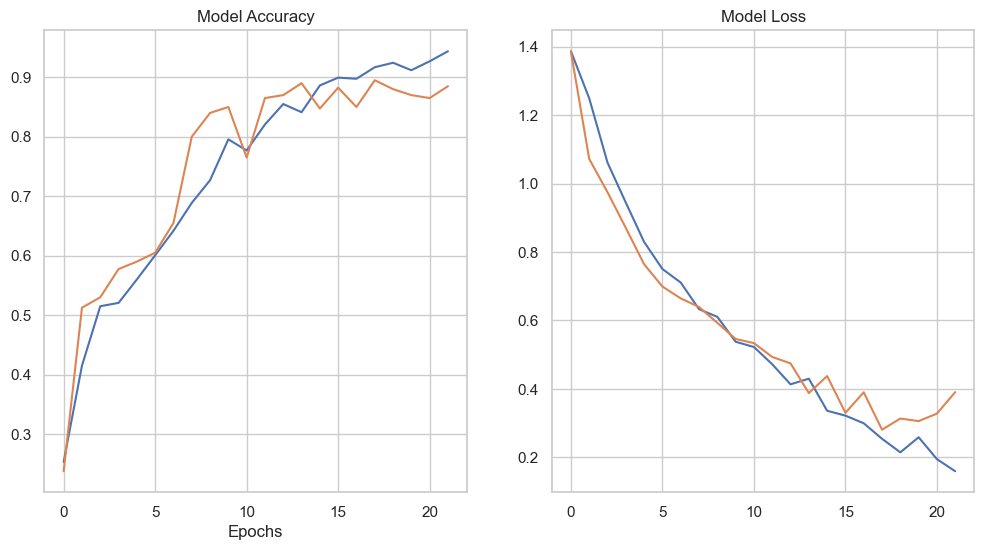

In [128]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')